In [ ]:
# Python code for Project 7.1.1 of Vincent Granville's Practical AI textbook:

# https://github.com/VincentGranville/Large-Language-Models/blob/main/Projects4.pdf

In [1]:
# load the packages

import pandas as pd
import numpy as np
import re   # for regular expressions


In [2]:
# Step 1 of 5: Understand the data

# download the Human genome DNA sequence, and examine it

url = "https://raw.githubusercontent.com/VincentGranville/Main/main/dna_human.txt"
human = pd.read_table(url)
# human = pd.read_table('dna_human.txt')
print(human.head())


                                            sequence  class
0  ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4  ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3


In [3]:
# Step 2 of 5: Compute Summary Statistics (for different gaps between string sequences)

# check the number of rows of this gemone text file, and initialize the hash counters to get counts
# of string sequences in the genome

nobs = len(human)
print('genome text file rows =',nobs)

hash12 = {}
hash1_list = {}
hash1 = {}
hash2 = {}
count1 = 0
count2 = 0
count12 = 0
sequence = ''

g = 3  # number of letters in the gap between the two string sequences, string1 and string2
print('gap between string sequences = ',g)

genome text file rows = 4380
gap between string sequences =  3


In [4]:

# create the hash tables -
#     extract all distinct strings (string1, string2) and count their occurences,
#     as well as occurences of the combined string (string12)

for k in range(nobs):
   obs = human['sequence'][k]
   sequence += obs
   sequence += 'N'
   type = human['class'][k]
   length = len(obs)
   string1_length = 4
   string2_length = 2
   pos0 = 0
   pos1 = pos0 + string1_length
   pos2 = pos1 + string2_length

   while pos2 < length:

       string1 = obs[pos0:pos1]
       string2 = obs[pos1+g:pos2+g]

       if string1 in hash1: 
           if string2 not in hash1_list[string1] and 'N' not in string2:
               hash1_list[string1] = hash1_list[string1] + '~' + string2
           hash1[string1] += 1
           count1 += 1
       elif 'N' not in string1:
           hash1_list[string1] = '~' + string2
           hash1[string1] = 1
       key = (string1, string2)

       if string2 in hash2:
           hash2[string2] += 1
           count2 += 1
       elif 'N' not in string2:
           hash2[string2] = 1

       if key in hash12:
           hash12[key] += 1
           count12 += 1
       elif 'N' not in string1 and 'N' not in string2:
           hash12[key] = 1

       pos0 += 1
       pos1 += 1
       pos2 += 1

   if k % 100 == 0:
       print("Creating hash tables: %6d %6d %4d" %(k, length, type))



Creating hash tables:      0    207    4
Creating hash tables:    100    951    6
Creating hash tables:    200   3531    3
Creating hash tables:    300   1383    4
Creating hash tables:    400   1854    0
Creating hash tables:    500   1560    6
Creating hash tables:    600    174    5
Creating hash tables:    700    671    3
Creating hash tables:    800    681    6
Creating hash tables:    900    408    0
Creating hash tables:   1000    475    1
Creating hash tables:   1100   2472    1
Creating hash tables:   1200    300    0
Creating hash tables:   1300    798    3
Creating hash tables:   1400   2610    6
Creating hash tables:   1500    989    4
Creating hash tables:   1600   1908    1
Creating hash tables:   1700    231    6
Creating hash tables:   1800   1731    3
Creating hash tables:   1900   4188    0
Creating hash tables:   2000   3897    1
Creating hash tables:   2100    216    6
Creating hash tables:   2200    387    3
Creating hash tables:   2300    375    4
Creating hash ta

In [5]:
# define a function to examine the first 10 key-value paris of a dictionary
# - apply this function to the various hash table dictionaries

def dict_head(dictionary, n=10):
    """Returns the first n key-value pairs of a dictionary."""
    return {key: dictionary[key] for key in list(dictionary)[:n]}


In [6]:
print('gap between string sequences = ',g)
dict_head(hash1_list)

gap between string sequences =  3


{'ATGC': '~AA~AG~TA~CC~CA~GA~TG~TC~GC~GG~CT~TT~AC~CG~AT~GT',
 'TGCC': '~AC~CT~GC~AA~TA~GG~AG~GT~GA~CG~CC~CA~AT~TT~TG~TC',
 'GCCC': '~CT~AT~AA~CA~CC~TC~TA~TT~GT~TG~CG~GA~AG~GC~AC~GG',
 'CCCC': '~TA~AC~CT~AA~AT~TC~TG~TT~GC~CG~GA~CC~AG~GT~GG~CA',
 'CCCA': '~AA~TA~TC~CC~AT~CT~AC~AG~CG~GG~CA~GA~TT~TG~GC~GT',
 'CCAA': '~AA~CC~GA~TC~TG~TA~CT~GG~GC~CA~AT~AG~GT~AC~TT~CG',
 'CAAC': '~AT~AA~CG~CT~GA~CC~TA~TG~AG~TC~AC~GT~GG~TT~CA~GC',
 'AACT': '~TA~AA~AC~CT~GC~TC~AG~GA~TT~GT~GG~CC~CG~TG~CA~AT',
 'ACTA': '~AC~TA~CT~AT~CC~AA~TC~GA~AG~GT~CA~GG~GC~TG~TT~CG',
 'CTAA': '~CT~TA~CC~AA~CA~AC~GA~TC~AT~AG~GG~GC~GT~TG~TT~CG'}

In [7]:
print('gap between string sequences = ',g)
dict_head(hash1)

gap between string sequences =  3


{'ATGC': 22361,
 'TGCC': 33120,
 'GCCC': 36378,
 'CCCC': 34345,
 'CCCA': 36529,
 'CCAA': 30513,
 'CAAC': 24960,
 'AACT': 19884,
 'ACTA': 11874,
 'CTAA': 8437}

In [8]:
print('gap between string sequences = ',g)
dict_head(hash2)

gap between string sequences =  3


{'AA': 370079,
 'AC': 308681,
 'CT': 394400,
 'TA': 176050,
 'AT': 286991,
 'CC': 436930,
 'CG': 176609,
 'GT': 253969,
 'TG': 436786,
 'GG': 403355}

In [9]:
print('gap between string sequences = ',g)
dict_head(hash12)

gap between string sequences =  3


{('ATGC', 'AA'): 1362,
 ('TGCC', 'AC'): 1737,
 ('GCCC', 'CT'): 2335,
 ('CCCC', 'TA'): 814,
 ('CCCA', 'AA'): 1789,
 ('CCAA', 'AA'): 1737,
 ('CAAC', 'AT'): 1828,
 ('AACT', 'TA'): 645,
 ('ACTA', 'AC'): 590,
 ('CTAA', 'CT'): 511}

In [10]:
# repeat the hash table generation for a gap of 2

# check the number of rows of this gemone text file, and initialize the hash counters to get counts
# of string sequences in the genome

nobs = len(human)
print('genome text file rows =',nobs)

hash12 = {}
hash1_list = {}
hash1 = {}
hash2 = {}
count1 = 0
count2 = 0
count12 = 0
sequence = ''

g = 2  # number of letters in the gap between the two string sequences, string1 and string2
print('gap between string sequences = ',g)

genome text file rows = 4380
gap between string sequences =  2


In [11]:

# create the hash tables -
#     extract all distinct strings (string1, string2) and count their occurences,
#     as well as occurences of the combined string (string12)

for k in range(nobs):
   obs = human['sequence'][k]
   sequence += obs
   sequence += 'N'
   type = human['class'][k]
   length = len(obs)
   string1_length = 4
   string2_length = 2
   pos0 = 0
   pos1 = pos0 + string1_length
   pos2 = pos1 + string2_length

   while pos2 < length:

       string1 = obs[pos0:pos1]
       string2 = obs[pos1+g:pos2+g]

       if string1 in hash1: 
           if string2 not in hash1_list[string1] and 'N' not in string2:
               hash1_list[string1] = hash1_list[string1] + '~' + string2
           hash1[string1] += 1
           count1 += 1
       elif 'N' not in string1:
           hash1_list[string1] = '~' + string2
           hash1[string1] = 1
       key = (string1, string2)

       if string2 in hash2:
           hash2[string2] += 1
           count2 += 1
       elif 'N' not in string2:
           hash2[string2] = 1

       if key in hash12:
           hash12[key] += 1
           count12 += 1
       elif 'N' not in string1 and 'N' not in string2:
           hash12[key] = 1

       pos0 += 1
       pos1 += 1
       pos2 += 1

   if k % 100 == 0:
       print("Creating hash tables: %6d %6d %4d" %(k, length, type))


Creating hash tables:      0    207    4
Creating hash tables:    100    951    6
Creating hash tables:    200   3531    3
Creating hash tables:    300   1383    4
Creating hash tables:    400   1854    0
Creating hash tables:    500   1560    6
Creating hash tables:    600    174    5
Creating hash tables:    700    671    3
Creating hash tables:    800    681    6
Creating hash tables:    900    408    0
Creating hash tables:   1000    475    1
Creating hash tables:   1100   2472    1
Creating hash tables:   1200    300    0
Creating hash tables:   1300    798    3
Creating hash tables:   1400   2610    6
Creating hash tables:   1500    989    4
Creating hash tables:   1600   1908    1
Creating hash tables:   1700    231    6
Creating hash tables:   1800   1731    3
Creating hash tables:   1900   4188    0
Creating hash tables:   2000   3897    1
Creating hash tables:   2100    216    6
Creating hash tables:   2200    387    3
Creating hash tables:   2300    375    4
Creating hash ta

In [12]:
print('gap between string sequences = ',g)
dict_head(hash1_list)

gap between string sequences =  2


{'ATGC': '~CA~TA~CT~TC~CC~TG~AA~GT~CG~GC~TT~AG~AT~GA~AC~GG',
 'TGCC': '~AA~CA~AC~AG~TC~TA~TT~TG~GG~CC~GA~CT~GT~GC~CG~AT',
 'GCCC': '~AC~CA~AA~GC~TT~TA~GT~AT~GG~CT~CC~GA~AG~CG~TC~TG',
 'CCCC': '~CT~TA~AC~CA~AA~AT~TT~CG~GC~GG~GT~AG~CC~TC~TG~GA',
 'CCCA': '~TA~AT~CT~AA~TC~GT~GA~CC~TG~AC~CG~GC~AG~TT~GG~CA',
 'CCAA': '~AA~CC~TG~AT~AC~GC~CT~CG~AG~GG~GA~TT~TC~TA~CA~GT',
 'CAAC': '~AA~CC~AC~TG~TA~TC~AT~TT~CT~CA~GA~GC~AG~GG~CG~GT',
 'AACT': '~AT~AA~CA~CC~CT~TG~TT~GA~CG~AG~TC~AC~GG~GT~TA~GC',
 'ACTA': '~TA~GT~CC~AA~AC~CA~CT~GG~AT~GC~AG~GA~TG~TC~CG~TT',
 'CTAA': '~AC~AT~AA~TC~GA~TT~GC~GG~CT~GT~CC~CA~CG~TG~AG~TA'}

In [13]:
print('gap between string sequences = ',g)
dict_head(hash1)

gap between string sequences =  2


{'ATGC': 22361,
 'TGCC': 33120,
 'GCCC': 36378,
 'CCCC': 34345,
 'CCCA': 36529,
 'CCAA': 30513,
 'CAAC': 24960,
 'AACT': 19884,
 'ACTA': 11874,
 'CTAA': 8437}

In [14]:
print('gap between string sequences = ',g)
dict_head(hash2)

gap between string sequences =  2


{'CA': 443580,
 'AA': 370349,
 'AC': 308975,
 'CT': 394663,
 'TA': 176111,
 'AT': 287160,
 'CC': 437362,
 'CG': 176820,
 'GT': 254190,
 'TG': 437011}

In [15]:
print('gap between string sequences = ',g)
dict_head(hash12)

gap between string sequences =  2


{('ATGC', 'CA'): 1668,
 ('TGCC', 'AA'): 1426,
 ('GCCC', 'AC'): 1699,
 ('CCCC', 'CT'): 2460,
 ('CCCA', 'TA'): 942,
 ('CCAA', 'AA'): 2079,
 ('CAAC', 'AA'): 1276,
 ('AACT', 'AT'): 1344,
 ('ACTA', 'TA'): 333,
 ('CTAA', 'AC'): 552}

In [16]:
# repeat the hash table generation for a gap of 1

# check the number of rows of this gemone text file, and initialize the hash counters to get counts
# of string sequences in the genome

nobs = len(human)
print('genome text file rows =',nobs)

hash12 = {}
hash1_list = {}
hash1 = {}
hash2 = {}
count1 = 0
count2 = 0
count12 = 0
sequence = ''

g = 1  # number of letters in the gap between the two string sequences, string1 and string2
print('gap between string sequences = ',g)

genome text file rows = 4380
gap between string sequences =  1


In [17]:

# create the hash tables -
#     extract all distinct strings (string1, string2) and count their occurences,
#     as well as occurences of the combined string (string12)

for k in range(nobs):
   obs = human['sequence'][k]
   sequence += obs
   sequence += 'N'
   type = human['class'][k]
   length = len(obs)
   string1_length = 4
   string2_length = 2
   pos0 = 0
   pos1 = pos0 + string1_length
   pos2 = pos1 + string2_length

   while pos2 < length:

       string1 = obs[pos0:pos1]
       string2 = obs[pos1+g:pos2+g]

       if string1 in hash1: 
           if string2 not in hash1_list[string1] and 'N' not in string2:
               hash1_list[string1] = hash1_list[string1] + '~' + string2
           hash1[string1] += 1
           count1 += 1
       elif 'N' not in string1:
           hash1_list[string1] = '~' + string2
           hash1[string1] = 1
       key = (string1, string2)

       if string2 in hash2:
           hash2[string2] += 1
           count2 += 1
       elif 'N' not in string2:
           hash2[string2] = 1

       if key in hash12:
           hash12[key] += 1
           count12 += 1
       elif 'N' not in string1 and 'N' not in string2:
           hash12[key] = 1

       pos0 += 1
       pos1 += 1
       pos2 += 1

   if k % 100 == 0:
       print("Creating hash tables: %6d %6d %4d" %(k, length, type))


Creating hash tables:      0    207    4
Creating hash tables:    100    951    6
Creating hash tables:    200   3531    3
Creating hash tables:    300   1383    4
Creating hash tables:    400   1854    0
Creating hash tables:    500   1560    6
Creating hash tables:    600    174    5
Creating hash tables:    700    671    3
Creating hash tables:    800    681    6
Creating hash tables:    900    408    0
Creating hash tables:   1000    475    1
Creating hash tables:   1100   2472    1
Creating hash tables:   1200    300    0
Creating hash tables:   1300    798    3
Creating hash tables:   1400   2610    6
Creating hash tables:   1500    989    4
Creating hash tables:   1600   1908    1
Creating hash tables:   1700    231    6
Creating hash tables:   1800   1731    3
Creating hash tables:   1900   4188    0
Creating hash tables:   2000   3897    1
Creating hash tables:   2100    216    6
Creating hash tables:   2200    387    3
Creating hash tables:   2300    375    4
Creating hash ta

In [18]:
print('gap between string sequences = ',g)
dict_head(hash1_list)

gap between string sequences =  1


{'ATGC': '~CC~CT~TT~GC~AC~GT~AT~CA~AG~GG~GA~TC~AA~TA~CG~TG',
 'TGCC': '~CA~CC~TA~TT~AT~CT~AA~GC~GT~GG~AG~TG~AC~TC~GA~CG',
 'GCCC': '~AA~CC~TA~CA~AG~CT~GG~GA~TG~CG~GC~AC~TC~TT~GT~AT',
 'CCCC': '~AC~AT~TA~CA~TC~CT~CC~GC~CG~GG~AA~GT~TG~GA~AG~TT',
 'CCCA': '~CT~CA~AC~AA~TT~GT~GG~AG~GC~TA~CC~CG~GA~TC~AT~TG',
 'CCAA': '~TA~GC~AT~AA~CA~AG~CC~TG~TC~GT~GA~CT~TT~AC~CG~GG',
 'CAAC': '~AA~AC~GA~AT~CT~CA~GC~TC~GT~CC~AG~GG~TG~TA~TT~CG',
 'AACT': '~AA~CC~AC~TC~CT~TT~TG~AT~TA~AG~CA~GC~GT~GG~GA~CG',
 'ACTA': '~AT~CG~TC~AA~CA~CC~AG~TA~CT~TT~GA~TG~GG~GT~AC~GC',
 'CTAA': '~TA~AA~CA~CT~GG~AT~CG~TG~TC~AC~GA~CC~GC~GT~AG~TT'}

In [19]:
print('gap between string sequences = ',g)
dict_head(hash1)

gap between string sequences =  1


{'ATGC': 22361,
 'TGCC': 33120,
 'GCCC': 36378,
 'CCCC': 34345,
 'CCCA': 36529,
 'CCAA': 30513,
 'CAAC': 24960,
 'AACT': 19884,
 'ACTA': 11874,
 'CTAA': 8437}

In [20]:
print('gap between string sequences = ',g)
dict_head(hash2)

gap between string sequences =  1


{'CC': 437679,
 'CA': 443935,
 'AA': 370460,
 'AC': 309210,
 'CT': 394902,
 'TA': 176260,
 'AT': 287276,
 'CG': 177004,
 'GT': 254417,
 'TG': 437317}

In [21]:
print('gap between string sequences = ',g)
dict_head(hash12)

gap between string sequences =  1


{('ATGC', 'CC'): 1199,
 ('TGCC', 'CA'): 2143,
 ('GCCC', 'AA'): 1311,
 ('CCCC', 'AC'): 2224,
 ('CCCA', 'CT'): 3002,
 ('CCAA', 'TA'): 1331,
 ('CAAC', 'AA'): 1334,
 ('AACT', 'AA'): 1518,
 ('ACTA', 'AT'): 1186,
 ('CTAA', 'TA'): 348}

In [22]:
# repeat the hash table generation for a gap of 0

# check the number of rows of this gemone text file, and initialize the hash counters to get counts
# of string sequences in the genome

nobs = len(human)
print('genome text file rows =',nobs)

hash12 = {}
hash1_list = {}
hash1 = {}
hash2 = {}
count1 = 0
count2 = 0
count12 = 0
sequence = ''

g = 0  # number of letters in the gap between the two string sequences, string1 and string2
print('gap between string sequences = ',g)

genome text file rows = 4380
gap between string sequences =  0


In [23]:

# create the hash tables -
#     extract all distinct strings (string1, string2) and count their occurences,
#     as well as occurences of the combined string (string12)

for k in range(nobs):
   obs = human['sequence'][k]
   sequence += obs
   sequence += 'N'
   type = human['class'][k]
   length = len(obs)
   string1_length = 4
   string2_length = 2
   pos0 = 0
   pos1 = pos0 + string1_length
   pos2 = pos1 + string2_length

   while pos2 < length:

       string1 = obs[pos0:pos1]
       string2 = obs[pos1+g:pos2+g]

       if string1 in hash1: 
           if string2 not in hash1_list[string1] and 'N' not in string2:
               hash1_list[string1] = hash1_list[string1] + '~' + string2
           hash1[string1] += 1
           count1 += 1
       elif 'N' not in string1:
           hash1_list[string1] = '~' + string2
           hash1[string1] = 1
       key = (string1, string2)

       if string2 in hash2:
           hash2[string2] += 1
           count2 += 1
       elif 'N' not in string2:
           hash2[string2] = 1

       if key in hash12:
           hash12[key] += 1
           count12 += 1
       elif 'N' not in string1 and 'N' not in string2:
           hash12[key] = 1

       pos0 += 1
       pos1 += 1
       pos2 += 1

   if k % 100 == 0:
       print("Creating hash tables: %6d %6d %4d" %(k, length, type))


Creating hash tables:      0    207    4
Creating hash tables:    100    951    6
Creating hash tables:    200   3531    3
Creating hash tables:    300   1383    4
Creating hash tables:    400   1854    0
Creating hash tables:    500   1560    6
Creating hash tables:    600    174    5
Creating hash tables:    700    671    3
Creating hash tables:    800    681    6
Creating hash tables:    900    408    0
Creating hash tables:   1000    475    1
Creating hash tables:   1100   2472    1
Creating hash tables:   1200    300    0
Creating hash tables:   1300    798    3
Creating hash tables:   1400   2610    6
Creating hash tables:   1500    989    4
Creating hash tables:   1600   1908    1
Creating hash tables:   1700    231    6
Creating hash tables:   1800   1731    3
Creating hash tables:   1900   4188    0
Creating hash tables:   2000   3897    1
Creating hash tables:   2100    216    6
Creating hash tables:   2200    387    3
Creating hash tables:   2300    375    4
Creating hash ta

In [24]:
print('gap between string sequences = ',g)
dict_head(hash1_list)

gap between string sequences =  0


{'ATGC': '~CC~AC~AT~AG~AA~TG~CA~GG~GC~TC~CT~TT~TA~GT~CG~GA',
 'TGCC': '~CC~AC~TC~CT~TT~AA~CA~CG~AG~TG~AT~GT~TA~GA~GG~GC',
 'GCCC': '~CA~AC~AT~CC~TA~TG~TC~AA~CG~AG~GC~GG~CT~TT~GT~GA',
 'CCCC': '~AA~CA~AT~AC~CT~TC~TT~TG~GA~CG~GC~GG~AG~CC~GT~TA',
 'CCCA': '~AC~CC~TA~CA~CT~AG~TG~TT~AA~GA~GG~TC~AT~GC~CG~GT',
 'CCAA': '~CT~AG~AA~AT~CA~CC~TA~GC~TT~GT~TC~GA~GG~TG~AC~CG',
 'CAAC': '~TA~AA~CG~AC~CA~TG~AG~CT~CC~GA~AT~GT~GG~TC~GC~TT',
 'AACT': '~AA~AC~AT~GC~CT~GT~TA~GA~TC~CG~GG~TG~CA~CC~AG~TT',
 'ACTA': '~AA~CC~TT~AT~AC~GT~TC~TG~CT~CA~CG~TA~GA~AG~GC~GG',
 'CTAA': '~AT~AA~TC~CC~AG~GA~CA~TT~CT~GG~AC~GC~TG~CG~GT~TA'}

In [25]:
print('gap between string sequences = ',g)
dict_head(hash1)

gap between string sequences =  0


{'ATGC': 22361,
 'TGCC': 33120,
 'GCCC': 36378,
 'CCCC': 34345,
 'CCCA': 36529,
 'CCAA': 30513,
 'CAAC': 24960,
 'AACT': 19884,
 'ACTA': 11874,
 'CTAA': 8437}

In [26]:
print('gap between string sequences = ',g)
dict_head(hash2)

gap between string sequences =  0


{'CC': 438051,
 'CA': 444146,
 'AA': 369719,
 'AC': 309407,
 'CT': 395209,
 'TA': 176265,
 'AT': 287514,
 'CG': 177339,
 'GT': 254504,
 'TG': 437576}

In [27]:
print('gap between string sequences = ',g)
dict_head(hash12)

gap between string sequences =  0


{('ATGC', 'CC'): 2057,
 ('TGCC', 'CC'): 3018,
 ('GCCC', 'CA'): 2947,
 ('CCCC', 'AA'): 2458,
 ('CCCA', 'AC'): 1906,
 ('CCAA', 'CT'): 1831,
 ('CAAC', 'TA'): 1239,
 ('AACT', 'AA'): 515,
 ('ACTA', 'AA'): 779,
 ('CTAA', 'AT'): 665}

In [ ]:
# Step 3 of 5: String Associations, using the Pointwide Mutual Information metric (PMI):
# the following steps of this project are using the Zero Gap results (g = 0)

In [28]:

print()
index = 0
for key in hash12:
    index +=1
    string1 = key[0]
    string2 = key[1]
    n1 = hash1[string1]  # occurrences of string1 
    n2 = hash2[string2]  # occurrences of string2 
    n12 = hash12[key]    # occurrences of (string1, string2) 
    p1 = n1 / count1     # frequency of string1
    p2 = n2 / count2     # frequency of string2
    p12 = n12 / count12  # frequency of (string1, string2)
    pmi = p12 / (p1 * p2)
    if index % 100 == 0:
        print("Computing string frequencies: %5d %4s %2s %4d %8.5f" 
                %(index, string1, string2, n12, pmi))
print()




Computing string frequencies:   100 CCTC CC 2787  1.04302
Computing string frequencies:   200 CAGT AC 1498  0.94005
Computing string frequencies:   300 TAAA GG  941  0.99870
Computing string frequencies:   400 CCCC TT 1475  0.84700
Computing string frequencies:   500 TCAA CC 1662  0.81610
Computing string frequencies:   600 AATT CT 1483  1.25715
Computing string frequencies:   700 GCCT TT 1530  0.97461
Computing string frequencies:   800 CGGT AG   82  0.15251
Computing string frequencies:   900 GGAT GG 2687  1.72024
Computing string frequencies:  1000 TCAG AC 1569  0.91170
Computing string frequencies:  1100 GGCA AA 1714  0.87678
Computing string frequencies:  1200 GAAA CG  653  0.59980
Computing string frequencies:  1300 CCCG AT  543  0.57899
Computing string frequencies:  1400 ATTC GG  407  0.33851
Computing string frequencies:  1500 ATGG TC 1333  0.70385
Computing string frequencies:  1600 GGAA TA 1055  0.94426
Computing string frequencies:  1700 TTCT GC 2279  1.30476
Computing str

In [ ]:
# Step 4 of 5: Synthesize a DNA sequence (along with a random sequence for comparison)

In [29]:
n_synthetic_string2 = 2000000
seed = 790
np.random.seed(seed)

synthetic_sequence = 'ATGC'    # starting point (must be existing string1)
pos1 = len(synthetic_sequence)
pos0 = pos1 - string1_length 


In [30]:
# generate the synthetic sequence

for k in range(n_synthetic_string2):

    string1 = synthetic_sequence[pos0:pos1]
    string = hash1_list[string1]
    myList = re.split('~', string)

    # get target string2 list in arr_string2, and corresponding probabilities in arr_proba
    arr_string2 = []
    arr_proba   = []
    cnt = 0
    for j in range(len(myList)):
        string2 = myList[j]
        if string2 in hash2:
            key = (string1, string2)
            cnt += hash12[key]
            arr_string2.append(string2)
            arr_proba.append(hash12[key])
    arr_proba = np.array(arr_proba)/cnt

    # build cdf and sample word2 from cdf, based on string1 
    u = np.random.uniform(0, 1) 
    cdf = arr_proba[0]
    j = 0
    while u > cdf:
        j += 1
        cdf += arr_proba[j]
    synthetic_string2 = arr_string2[j]
    synthetic_sequence += synthetic_string2
    if k % 100000 == 0:
        print("Synthesizing %7d/%7d: %4d %8.5f %2s" 
                  % (k, n_synthetic_string2, j, u, synthetic_string2))

    pos0 += string2_length
    pos1 += string2_length

print()
print("Real DNA:\n", sequence[0:1000])
print()
print("Synthetic DNA:\n", synthetic_sequence[0:1000])
print()



Synthesizing       0/2000000:    6  0.53979 CA
Synthesizing  100000/2000000:    9  0.68809 TG
Synthesizing  200000/2000000:    9  0.60181 GA
Synthesizing  300000/2000000:    1  0.17115 GC
Synthesizing  400000/2000000:   15  0.99825 TT
Synthesizing  500000/2000000:    7  0.46703 CA
Synthesizing  600000/2000000:    5  0.42770 TG
Synthesizing  700000/2000000:    5  0.33472 CC
Synthesizing  800000/2000000:   10  0.68786 GA
Synthesizing  900000/2000000:    1  0.07265 GA
Synthesizing 1000000/2000000:    6  0.41697 GA
Synthesizing 1100000/2000000:    5  0.33812 GC
Synthesizing 1200000/2000000:   10  0.79131 GG
Synthesizing 1300000/2000000:   11  0.78769 GG
Synthesizing 1400000/2000000:    0  0.11624 TG
Synthesizing 1500000/2000000:    1  0.21540 TG
Synthesizing 1600000/2000000:   12  0.74904 CC
Synthesizing 1700000/2000000:    0  0.04111 CC
Synthesizing 1800000/2000000:    1  0.05652 CC
Synthesizing 1900000/2000000:    5  0.39545 TG

Real DNA:
 ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATA

In [31]:
# generate the random sequence

print("Creating random sequence...")
length = (1 + n_synthetic_string2) * string2_length
random_sequence = ""
map = ['A', 'C', 'T', 'G']

for k in range(length):
    random_sequence += map[np.random.randint(4)]
    if k % 100000 == 0:
        print("Creating random sequence: %7d/%7d" %(k,length))
print()
print("Random DNA:\n", random_sequence[0:1000])
print()


Creating random sequence...
Creating random sequence:       0/4000002
Creating random sequence:  100000/4000002
Creating random sequence:  200000/4000002
Creating random sequence:  300000/4000002
Creating random sequence:  400000/4000002
Creating random sequence:  500000/4000002
Creating random sequence:  600000/4000002
Creating random sequence:  700000/4000002
Creating random sequence:  800000/4000002
Creating random sequence:  900000/4000002
Creating random sequence: 1000000/4000002
Creating random sequence: 1100000/4000002
Creating random sequence: 1200000/4000002
Creating random sequence: 1300000/4000002
Creating random sequence: 1400000/4000002
Creating random sequence: 1500000/4000002
Creating random sequence: 1600000/4000002
Creating random sequence: 1700000/4000002
Creating random sequence: 1800000/4000002
Creating random sequence: 1900000/4000002
Creating random sequence: 2000000/4000002
Creating random sequence: 2100000/4000002
Creating random sequence: 2200000/4000002
Creati

In [ ]:
# Step 5 of 5 (part a): Evaluate the quality:
#     n1 = 4 (length of string1), n2 = 2 (length of string2), n3 = 6 (n1+n2), max_nodes = 10,000

In [32]:

max_nodes = 10000  # sample strings for frequency comparison
string_length = 6  # length of sample strings (fixed length here)

nodes = 0
hnodes = {}
iter = 0


In [33]:

while nodes < max_nodes and iter < 5*max_nodes:
    index = np.random.randint(0, len(sequence)-string_length)
    string = sequence[index:index+string_length]
    iter += 1
    if string not in hnodes and 'N' not in string:
        hnodes[string] = True
        nodes += 1
        if nodes % 1000 == 0:
            print("Building nodes: %6d/%6d" %(nodes, max_nodes))
print()


Building nodes:   1000/ 10000
Building nodes:   2000/ 10000
Building nodes:   3000/ 10000
Building nodes:   4000/ 10000



In [34]:

def compute_HD(hnodes, sequence, synthetic_sequence):

    pdf1 = []
    pdf2 = []
    cc = 0

    for string in hnodes:
        cnt1 = sequence.count(string) 
        cnt2 = synthetic_sequence.count(string) 
        pdf1.append(float(cnt1))
        pdf2.append(float(cnt2))
        ratio = cnt2 / cnt1
        if cc % 100 == 0:
            print("Evaluation: computing EPDFs: %6d/%6d: %5s %8d %8d %10.7f" 
                   %(cc, nodes, string, cnt1, cnt2, ratio))
        cc += 1

    pdf1 = np.array(pdf1)   # original dna sequence
    pdf2 = np.array(pdf2)   # synthetic dna sequence
    pdf1 /= np.sum(pdf1)
    pdf2 /= np.sum(pdf2)

    HD = 0.0
    for k in range(len(pdf1)):
        HD += np.sqrt(pdf1[k]*pdf2[k])
    HD = np.sqrt(1 - HD)
    return(pdf1, pdf2, HD) 


In [35]:
pdf_dna, pdf_synth,  HD_synth  = compute_HD(hnodes, sequence, synthetic_sequence)
pdf_dna, pdf_random, HD_random = compute_HD(hnodes, sequence, random_sequence)

print()
print("Total nodes: %6d" %(nodes))
print("Hellinger distance [synthetic]: HD = %8.5f" %(HD_synth))
print("Hellinger distance [random]   : HD = %8.5f" %(HD_random))


Evaluation: computing EPDFs:      0/  4041: TAAGAA     1093      864  0.7904849
Evaluation: computing EPDFs:    100/  4041: CACAAT     1032      753  0.7296512
Evaluation: computing EPDFs:    200/  4041: TTTGTG     1933     1366  0.7066736
Evaluation: computing EPDFs:    300/  4041: ATGCAG     2815     1976  0.7019538
Evaluation: computing EPDFs:    400/  4041: GGATAG      417      330  0.7913669
Evaluation: computing EPDFs:    500/  4041: CTGGCT     3575     2587  0.7236364
Evaluation: computing EPDFs:    600/  4041: GTCAAG     1468     1208  0.8228883
Evaluation: computing EPDFs:    700/  4041: GAGACG      818      540  0.6601467
Evaluation: computing EPDFs:    800/  4041: ATGTAA      788      517  0.6560914
Evaluation: computing EPDFs:    900/  4041: GGACCT     2393     1813  0.7576264
Evaluation: computing EPDFs:   1000/  4041: ATTGGA     1367     1024  0.7490856
Evaluation: computing EPDFs:   1100/  4041: ATCCCA     1727     1242  0.7191662
Evaluation: computing EPDFs:   1200/  40

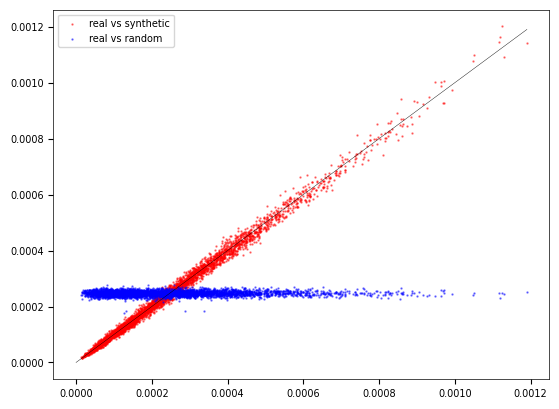

In [36]:

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

plt.scatter(pdf_dna, pdf_synth, s = 0.5, color = 'red', alpha = 0.5)
plt.scatter(pdf_dna, pdf_random, s = 0.5, color = 'blue', alpha = 0.5)
plt.legend(['real vs synthetic', 'real vs random'], loc='upper left', prop={'size': 7}, )
plt.plot([0, np.max(pdf_dna)], [0, np.max(pdf_dna)], c='black', linewidth = 0.3)
plt.show()


In [ ]:
# the scatterplot shows that the synthetically-generated DNA sequences match the real DNA much better than the random DNA sequnece.
# this visual result is also supported by the much lower Hellinger distance for the synthetic DNA sequnece (0.01891)

In [ ]:
# repoeat for different n1, n2, n3:

# Step 5 of 5 (part b): Evaluate the quality:
#     n1 = 5 (length of string1), n2 = 3 (length of string2), n3 = 8 (n1+n2), max_nodes = 10,000

In [37]:
# repeat the hash table generation for a gap of 0

# check the number of rows of this gemone text file, and initialize the hash counters to get counts
# of string sequences in the genome

nobs = len(human)
print('genome text file rows =',nobs)

hash12 = {}
hash1_list = {}
hash1 = {}
hash2 = {}
count1 = 0
count2 = 0
count12 = 0
sequence = ''

g = 0  # number of letters in the gap between the two string sequences, string1 and string2
print('gap between string sequences = ',g)

genome text file rows = 4380
gap between string sequences =  0


In [38]:

# create the hash tables -
#     extract all distinct strings (string1, string2) and count their occurences,
#     as well as occurences of the combined string (string12)

for k in range(nobs):
   obs = human['sequence'][k]
   sequence += obs
   sequence += 'N'
   type = human['class'][k]
   length = len(obs)
   string1_length = 5
   string2_length = 3
   pos0 = 0
   pos1 = pos0 + string1_length
   pos2 = pos1 + string2_length

   while pos2 < length:

       string1 = obs[pos0:pos1]
       string2 = obs[pos1+g:pos2+g]

       if string1 in hash1: 
           if string2 not in hash1_list[string1] and 'N' not in string2:
               hash1_list[string1] = hash1_list[string1] + '~' + string2
           hash1[string1] += 1
           count1 += 1
       elif 'N' not in string1:
           hash1_list[string1] = '~' + string2
           hash1[string1] = 1
       key = (string1, string2)

       if string2 in hash2:
           hash2[string2] += 1
           count2 += 1
       elif 'N' not in string2:
           hash2[string2] = 1

       if key in hash12:
           hash12[key] += 1
           count12 += 1
       elif 'N' not in string1 and 'N' not in string2:
           hash12[key] = 1

       pos0 += 1
       pos1 += 1
       pos2 += 1

   if k % 100 == 0:
       print("Creating hash tables: %6d %6d %4d" %(k, length, type))



Creating hash tables:      0    207    4
Creating hash tables:    100    951    6
Creating hash tables:    200   3531    3
Creating hash tables:    300   1383    4
Creating hash tables:    400   1854    0
Creating hash tables:    500   1560    6
Creating hash tables:    600    174    5
Creating hash tables:    700    671    3
Creating hash tables:    800    681    6
Creating hash tables:    900    408    0
Creating hash tables:   1000    475    1
Creating hash tables:   1100   2472    1
Creating hash tables:   1200    300    0
Creating hash tables:   1300    798    3
Creating hash tables:   1400   2610    6
Creating hash tables:   1500    989    4
Creating hash tables:   1600   1908    1
Creating hash tables:   1700    231    6
Creating hash tables:   1800   1731    3
Creating hash tables:   1900   4188    0
Creating hash tables:   2000   3897    1
Creating hash tables:   2100    216    6
Creating hash tables:   2200    387    3
Creating hash tables:   2300    375    4
Creating hash ta

In [39]:
print('gap between string sequences = ',g)
dict_head(hash12)

gap between string sequences =  0


{('ATGCC', 'CCA'): 144,
 ('TGCCC', 'CAA'): 187,
 ('GCCCC', 'AAC'): 97,
 ('CCCCA', 'ACT'): 202,
 ('CCCAA', 'CTA'): 77,
 ('CCAAC', 'TAA'): 46,
 ('CAACT', 'AAA'): 91,
 ('AACTA', 'AAT'): 64,
 ('ACTAA', 'ATA'): 23,
 ('CTAAA', 'TAC'): 27}

In [40]:

print()
index = 0
for key in hash12:
    index +=1
    string1 = key[0]
    string2 = key[1]
    n1 = hash1[string1]  # occurrences of string1 
    n2 = hash2[string2]  # occurrences of string2 
    n12 = hash12[key]    # occurrences of (string1, string2) 
    p1 = n1 / count1     # frequency of string1
    p2 = n2 / count2     # frequency of string2
    p12 = n12 / count12  # frequency of (string1, string2)
    pmi = p12 / (p1 * p2)
    if index % 100 == 0:
        print("Computing string frequencies: %5d %4s %2s %4d %8.5f" 
                %(index, string1, string2, n12, pmi))
print()




Computing string frequencies:   100 CTACC TCC  148  1.34731
Computing string frequencies:   200 CTAGG CCT   29  0.94743
Computing string frequencies:   300 TAATC AAA   36  1.10339
Computing string frequencies:   400 CCTCC TCG   84  1.30282
Computing string frequencies:   500 CTCTA AGA   87  0.91922
Computing string frequencies:   600 CAATA GCC   27  0.35423
Computing string frequencies:   700 CTCTA CAC  111  1.63708
Computing string frequencies:   800 ACCTG CAC  173  0.92787
Computing string frequencies:   900 ATGCA TTC   90  0.96077
Computing string frequencies:  1000 AGAAA TAT  139  1.16708
Computing string frequencies:  1100 TGAGA TAA   50  1.10111
Computing string frequencies:  1200 AGTGT TCC   68  0.81211
Computing string frequencies:  1300 ATTGA AGC   96  0.94897
Computing string frequencies:  1400 GGTTA AAT   72  2.74238
Computing string frequencies:  1500 ATCCT TTT   78  0.80274
Computing string frequencies:  1600 AAGCA GCT  248  1.53650
Computing string frequencies:  1700 TTG

In [41]:
n_synthetic_string2 = 2000000
seed = 14
np.random.seed(seed)

synthetic_sequence = 'ATGCC'    # starting point (must be existing string1)
pos1 = len(synthetic_sequence)
pos0 = pos1 - string1_length 

In [42]:
# generate the synthetic sequence

for k in range(n_synthetic_string2):

    string1 = synthetic_sequence[pos0:pos1]
    string = hash1_list[string1]
    myList = re.split('~', string)

    # get target string2 list in arr_string2, and corresponding probabilities in arr_proba
    arr_string2 = []
    arr_proba   = []
    cnt = 0
    for j in range(len(myList)):
        string2 = myList[j]
        if string2 in hash2:
            key = (string1, string2)
            cnt += hash12[key]
            arr_string2.append(string2)
            arr_proba.append(hash12[key])
    arr_proba = np.array(arr_proba)/cnt

    # build cdf and sample word2 from cdf, based on string1 
    u = np.random.uniform(0, 1) 
    cdf = arr_proba[0]
    j = 0
    while u > cdf:
        j += 1
        cdf += arr_proba[j]
    synthetic_string2 = arr_string2[j]
    synthetic_sequence += synthetic_string2
    if k % 100000 == 0:
        print("Synthesizing %7d/%7d: %4d %8.5f %2s" 
                  % (k, n_synthetic_string2, j, u, synthetic_string2))

    pos0 += string2_length
    pos1 += string2_length

print()
print("Real DNA:\n", sequence[0:1000])
print()
print("Synthetic DNA:\n", synthetic_sequence[0:1000])
print()



Synthesizing       0/2000000:   22  0.51394 AGA
Synthesizing  100000/2000000:   56  0.95166 ATC
Synthesizing  200000/2000000:   26  0.52163 TTC
Synthesizing  300000/2000000:   20  0.43078 GGC
Synthesizing  400000/2000000:   16  0.34379 TCC
Synthesizing  500000/2000000:    4  0.12597 GAA
Synthesizing  600000/2000000:   21  0.51499 TGA
Synthesizing  700000/2000000:   16  0.32758 AGA
Synthesizing  800000/2000000:   26  0.54055 AGA
Synthesizing  900000/2000000:    7  0.16775 AAA
Synthesizing 1000000/2000000:    4  0.08379 CTC
Synthesizing 1100000/2000000:   28  0.52809 TCC
Synthesizing 1200000/2000000:   22  0.40491 CAC
Synthesizing 1300000/2000000:   23  0.44979 GAC
Synthesizing 1400000/2000000:   10  0.15497 GAA
Synthesizing 1500000/2000000:   19  0.34086 CAG
Synthesizing 1600000/2000000:   24  0.42749 CAT
Synthesizing 1700000/2000000:   24  0.44356 GGC
Synthesizing 1800000/2000000:   10  0.26177 AAG
Synthesizing 1900000/2000000:   15  0.26319 AGC

Real DNA:
 ATGCCCCAACTAAATACTACCGTATGGC

In [43]:

max_nodes = 10000  # sample strings for frequency comparison
string_length = 8  # length of sample strings (fixed length here)

nodes = 0
hnodes = {}
iter = 0


In [44]:

while nodes < max_nodes and iter < 5*max_nodes:
    index = np.random.randint(0, len(sequence)-string_length)
    string = sequence[index:index+string_length]
    iter += 1
    if string not in hnodes and 'N' not in string:
        hnodes[string] = True
        nodes += 1
        if nodes % 1000 == 0:
            print("Building nodes: %6d/%6d" %(nodes, max_nodes))
print()


Building nodes:   1000/ 10000
Building nodes:   2000/ 10000
Building nodes:   3000/ 10000
Building nodes:   4000/ 10000
Building nodes:   5000/ 10000
Building nodes:   6000/ 10000
Building nodes:   7000/ 10000
Building nodes:   8000/ 10000
Building nodes:   9000/ 10000
Building nodes:  10000/ 10000



In [45]:
pdf_dna, pdf_synth,  HD_synth  = compute_HD(hnodes, sequence, synthetic_sequence)
pdf_dna, pdf_random, HD_random = compute_HD(hnodes, sequence, random_sequence)

print()
print("Total nodes: %6d" %(nodes))
print("Hellinger distance [synthetic]: HD = %8.5f" %(HD_synth))
print("Hellinger distance [random]   : HD = %8.5f" %(HD_random))


Evaluation: computing EPDFs:      0/ 10000: GGCAACAA      136      161  1.1838235
Evaluation: computing EPDFs:    100/ 10000: GGCGCTGC      248      255  1.0282258
Evaluation: computing EPDFs:    200/ 10000: CTCATGCC      107      138  1.2897196
Evaluation: computing EPDFs:    300/ 10000: CTCTCGCC       95       86  0.9052632
Evaluation: computing EPDFs:    400/ 10000: ATGTGCTT       98       74  0.7551020
Evaluation: computing EPDFs:    500/ 10000: TATTAAAT       59       43  0.7288136
Evaluation: computing EPDFs:    600/ 10000: ACCTGGTC      163      225  1.3803681
Evaluation: computing EPDFs:    700/ 10000: AGGAAAGT      146      172  1.1780822
Evaluation: computing EPDFs:    800/ 10000: CTGAAGCC      280      264  0.9428571
Evaluation: computing EPDFs:    900/ 10000: CCCATGGT      296      235  0.7939189
Evaluation: computing EPDFs:   1000/ 10000: ACACTTTG      115      128  1.1130435
Evaluation: computing EPDFs:   1100/ 10000: TTGTGTGA       75       74  0.9866667
Evaluation: comp

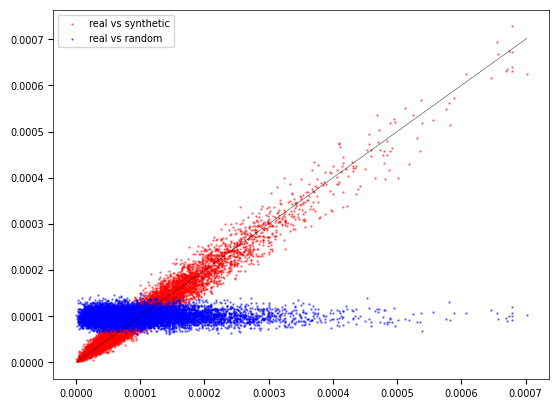

In [46]:
mpl.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

plt.scatter(pdf_dna, pdf_synth, s = 0.5, color = 'red', alpha = 0.5)
plt.scatter(pdf_dna, pdf_random, s = 0.5, color = 'blue', alpha = 0.5)
plt.legend(['real vs synthetic', 'real vs random'], loc='upper left', prop={'size': 7}, )
plt.plot([0, np.max(pdf_dna)], [0, np.max(pdf_dna)], c='black', linewidth = 0.3)
plt.show()


In [ ]:
# the scatterplot for (n1 = 5, n2 = 3, n3 = 8) shows that the synthetically-generated DNA sequences match the real DNA much better than the random DNA sequnece,
# but the match is not as good compared to the previous case (n1 = 4, n2 = 2, n3 = 6)
# this visual result is also supported by the larger Hellinger distance for this synthetic DNA sequnece (0.05613, larger than the previous result: 0.01891)

In [ ]:
# repoeat for max_nodes = 1,000

# Step 5 of 5 (part c): Evaluate the quality:
#     n1 = 5 (length of string1), n2 = 3 (length of string2), n3 = 8 (n1+n2), max_nodes = 1,000

In [47]:

max_nodes = 1000  # sample strings for frequency comparison
string_length = 8  # length of sample strings (fixed length here)

nodes = 0
hnodes = {}
iter = 0


In [48]:

# create the hash tables -
#     extract all distinct strings (string1, string2) and count their occurences,
#     as well as occurences of the combined string (string12)

for k in range(nobs):
   obs = human['sequence'][k]
   sequence += obs
   sequence += 'N'
   type = human['class'][k]
   length = len(obs)
   string1_length = 5
   string2_length = 3
   pos0 = 0
   pos1 = pos0 + string1_length
   pos2 = pos1 + string2_length

   while pos2 < length:

       string1 = obs[pos0:pos1]
       string2 = obs[pos1+g:pos2+g]

       if string1 in hash1: 
           if string2 not in hash1_list[string1] and 'N' not in string2:
               hash1_list[string1] = hash1_list[string1] + '~' + string2
           hash1[string1] += 1
           count1 += 1
       elif 'N' not in string1:
           hash1_list[string1] = '~' + string2
           hash1[string1] = 1
       key = (string1, string2)

       if string2 in hash2:
           hash2[string2] += 1
           count2 += 1
       elif 'N' not in string2:
           hash2[string2] = 1

       if key in hash12:
           hash12[key] += 1
           count12 += 1
       elif 'N' not in string1 and 'N' not in string2:
           hash12[key] = 1

       pos0 += 1
       pos1 += 1
       pos2 += 1

   if k % 100 == 0:
       print("Creating hash tables: %6d %6d %4d" %(k, length, type))



Creating hash tables:      0    207    4
Creating hash tables:    100    951    6
Creating hash tables:    200   3531    3
Creating hash tables:    300   1383    4
Creating hash tables:    400   1854    0
Creating hash tables:    500   1560    6
Creating hash tables:    600    174    5
Creating hash tables:    700    671    3
Creating hash tables:    800    681    6
Creating hash tables:    900    408    0
Creating hash tables:   1000    475    1
Creating hash tables:   1100   2472    1
Creating hash tables:   1200    300    0
Creating hash tables:   1300    798    3
Creating hash tables:   1400   2610    6
Creating hash tables:   1500    989    4
Creating hash tables:   1600   1908    1
Creating hash tables:   1700    231    6
Creating hash tables:   1800   1731    3
Creating hash tables:   1900   4188    0
Creating hash tables:   2000   3897    1
Creating hash tables:   2100    216    6
Creating hash tables:   2200    387    3
Creating hash tables:   2300    375    4
Creating hash ta

In [49]:

print()
index = 0
for key in hash12:
    index +=1
    string1 = key[0]
    string2 = key[1]
    n1 = hash1[string1]  # occurrences of string1 
    n2 = hash2[string2]  # occurrences of string2 
    n12 = hash12[key]    # occurrences of (string1, string2) 
    p1 = n1 / count1     # frequency of string1
    p2 = n2 / count2     # frequency of string2
    p12 = n12 / count12  # frequency of (string1, string2)
    pmi = p12 / (p1 * p2)
    if index % 1000 == 0:
        print("Computing string frequencies: %5d %4s %2s %4d %8.5f" 
                %(index, string1, string2, n12, pmi))
print()




Computing string frequencies:  1000 AGAAA TAT  278  1.16026
Computing string frequencies:  2000 GCCCA TGG  342  0.65508
Computing string frequencies:  3000 TGAGG AGT  326  1.50941
Computing string frequencies:  4000 TTCAT TGA  304  1.27049
Computing string frequencies:  5000 ACTTC AGC  444  1.52131
Computing string frequencies:  6000 CGCCG TGA   80  0.55878
Computing string frequencies:  7000 CTTAA ACT  100  1.66650
Computing string frequencies:  8000 ACACC CAG  350  1.00346
Computing string frequencies:  9000 GAGAA TTA  216  1.09911
Computing string frequencies: 10000 TTCAG CAG  598  1.22491
Computing string frequencies: 11000 CTGAC CCC  554  1.84221
Computing string frequencies: 12000 ACTAT GGT   82  0.95973
Computing string frequencies: 13000 GAAAT TAT  182  1.37128
Computing string frequencies: 14000 GACAA TTG   82  0.45335
Computing string frequencies: 15000 CTTAT GGC  116  1.10958
Computing string frequencies: 16000 GGGGT GCT  186  1.36457
Computing string frequencies: 17000 GGC

In [50]:

while nodes < max_nodes and iter < 5*max_nodes:
    index = np.random.randint(0, len(sequence)-string_length)
    string = sequence[index:index+string_length]
    iter += 1
    if string not in hnodes and 'N' not in string:
        hnodes[string] = True
        nodes += 1
        if nodes % 100 == 0:
            print("Building nodes: %6d/%6d" %(nodes, max_nodes))
print()


Building nodes:    100/  1000
Building nodes:    200/  1000
Building nodes:    300/  1000
Building nodes:    400/  1000
Building nodes:    500/  1000
Building nodes:    600/  1000
Building nodes:    700/  1000
Building nodes:    800/  1000
Building nodes:    900/  1000
Building nodes:   1000/  1000



In [51]:
pdf_dna, pdf_synth,  HD_synth  = compute_HD(hnodes, sequence, synthetic_sequence)
pdf_dna, pdf_random, HD_random = compute_HD(hnodes, sequence, random_sequence)

print()
print("Total nodes: %6d" %(nodes))
print("Hellinger distance [synthetic]: HD = %8.5f" %(HD_synth))
print("Hellinger distance [random]   : HD = %8.5f" %(HD_random))


Evaluation: computing EPDFs:      0/  1000: ACTGGACA      384      199  0.5182292
Evaluation: computing EPDFs:    100/  1000: GCACTATG       50       50  1.0000000
Evaluation: computing EPDFs:    200/  1000: AATCTAGT       88       27  0.3068182
Evaluation: computing EPDFs:    300/  1000: AGAACCAG      586      288  0.4914676
Evaluation: computing EPDFs:    400/  1000: AAGAATTT      308      184  0.5974026
Evaluation: computing EPDFs:    500/  1000: TTGCTTAT       82       28  0.3414634
Evaluation: computing EPDFs:    600/  1000: TTCCTGAG      408      243  0.5955882
Evaluation: computing EPDFs:    700/  1000: CAGAGCTG      906      441  0.4867550
Evaluation: computing EPDFs:    800/  1000: TGCCACCG      270      157  0.5814815
Evaluation: computing EPDFs:    900/  1000: AGAATCCT      250      113  0.4520000
Evaluation: computing EPDFs:      0/  1000: ACTGGACA      384       65  0.1692708
Evaluation: computing EPDFs:    100/  1000: GCACTATG       50       54  1.0800000
Evaluation: comp

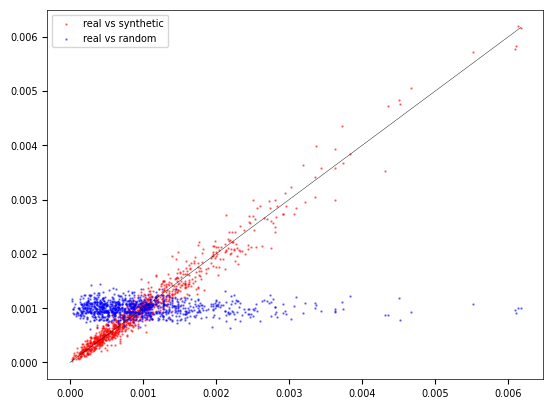

In [52]:
mpl.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

plt.scatter(pdf_dna, pdf_synth, s = 0.5, color = 'red', alpha = 0.5)
plt.scatter(pdf_dna, pdf_random, s = 0.5, color = 'blue', alpha = 0.5)
plt.legend(['real vs synthetic', 'real vs random'], loc='upper left', prop={'size': 7}, )
plt.plot([0, np.max(pdf_dna)], [0, np.max(pdf_dna)], c='black', linewidth = 0.3)
plt.show()


In [ ]:
# the scatterplot for (n1 = 5, n2 = 3, n3 = 8, max_nodes = 1,000)) shows that the synthetically-generated DNA sequences match the real DNA much better than the random DNA sequnece,
# and the result is very close to the previous case with max_nodes = 10,000.
# this visual result is also supported by the very similar Hellinger distances (HD) for the synthetic DNA sequneces:
# max_nodes = 1,000 has an HD of 0.05501, and max_nodes = 10,000 has an HD of 0.05613